### **Nombre:** Andrés Felipe Riaño Quintanilla.
### **Cédula:** 1083928808.

# **Laboratorio 08**

### **Librerías:**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons

2024-12-18 15:01:32.254199: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 15:01:32.257293: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 15:01:32.265602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734552092.278614 1092421 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734552092.282467 1092421 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 15:01:32.298008: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### **Funciones:**

In [2]:
def build_model(activation, loss, input_dim, final_layer, learning_rate):
  '''
  Crea un modelo sencillo de red neuronal con la información ingresada.

  Parámetros
  ----------
  activation : string
    Nombre de la función de activación de la última capa.
  loss : string
    Nombre de la función de coste a emplear.
  input_dim : int
    Número de características de los datos.
  final_layer : int
    Número de neuronas de la capa final.
  learning_rate : float
    Tasa de aprendizaje a emplear en el gradiente descendente.

  Retorna
  -------
  model : keras.src.models.sequential.Sequential
    Estructura del secuencial del modelo listo para ser entrenado.
  '''
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(8, input_dim=input_dim, activation='relu'))
  model.add(keras.layers.Dense(final_layer, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=learning_rate)  
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])   
  return model

### **Solución:**

<div style="text-align: justify;">  

**1.** Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

</div>

In [3]:
X1, y1 = make_moons(n_samples=1000, noise=0.2, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

<div style="text-align: justify;">  

Para este caso se usará la función de activación sigmoide en la capa de salida y la función de coste de entropía cruzada para clasificación binaria. Además de esto, se especificará en la función `build_model` que los datos presentan dos características y una neurona a la salida (porque es clasificación binaria). Se pone una tasa de aprendizaje de 0.1 porque fue la que mejor funcionó después de varios intentos.

</div>

Epoch 1/1000


/home/andres/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1734552094.547483 1092421 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6837 - loss: 0.5586 - val_accuracy: 0.7400 - val_loss: 0.5320
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4801 - val_accuracy: 0.7850 - val_loss: 0.4598
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8219 - loss: 0.4098 - val_accuracy: 0.8050 - val_loss: 0.4099
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8365 - loss: 0.3728 - val_accuracy: 0.8300 - val_loss: 0.3727
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8466 - loss: 0.3386 - val_accuracy: 0.8300 - val_loss: 0.3498
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8669 - loss: 0.3088 - val_accuracy: 0.8350 - val_loss: 0.3279
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8622 - loss: 0.3059 - val_accuracy: 0.8350 - val_loss: 0.3147
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.3328 - val_accuracy: 0.8400 - val_lo

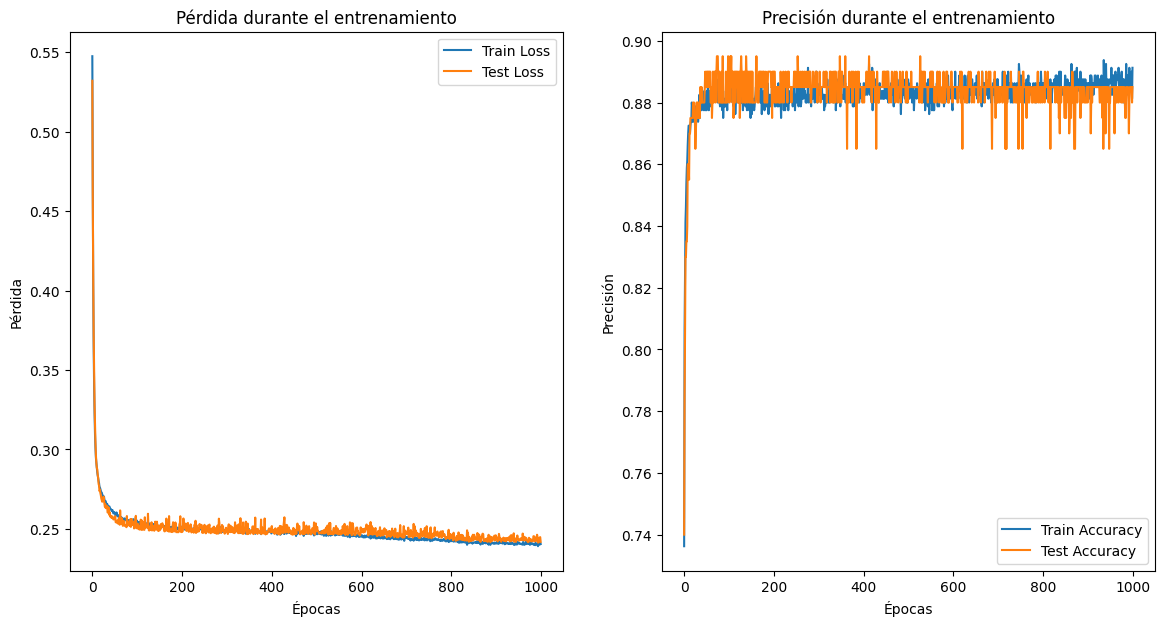

In [4]:
keras.backend.clear_session()
model1 = build_model('sigmoid','binary_crossentropy',2,1,0.1)
history1 = model1.fit(X1_train, y1_train, validation_data=(X1_test, y1_test), epochs=1000, verbose=1) 
_, train_acc = model1.evaluate(X1_train, y1_train, verbose=0) 
_, test_acc = model1.evaluate(X1_test, y1_test, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.figure(figsize=(14,7))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Test Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Test Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

<div style="text-align: justify;">  

La pérdida de entrenamiento y la pérdida de prueba decrecen hasta estabilizarse, y no hay una distancia considerable entre ambas. Análogamente, la precisión de entrenamiento y la precisión de prueba crecen hasta estabilizarse, y el valor al que convergen las curvas es muy similar. Todo esto sugiere que el modelo se comporta bien.

</div>

<div style="text-align: justify;">  

**2.** Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

</div>

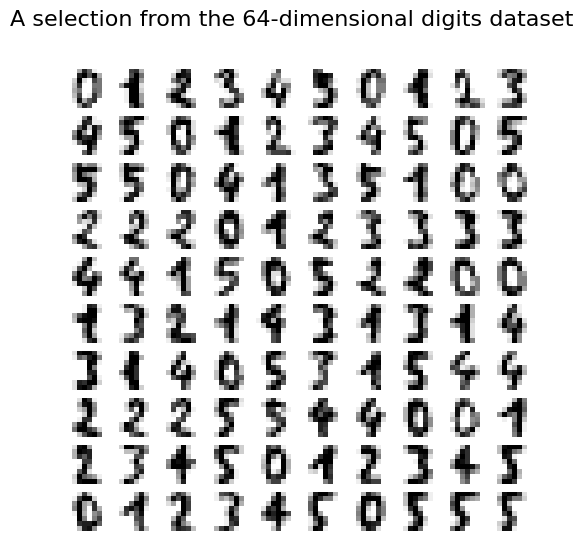

In [5]:
digits = load_digits(n_class=6)
X2, y2 = digits.data, digits.target
n_samples, n_features = X2.shape
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X2[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

<div style="text-align: justify;">  

Para este caso se usará la función de activación softmax en la capa de salida y la función de coste de entropía cruzada categórica. Además de esto, se especificará en la función `build_model` que los datos presentan seis características y seis neuronas a la salida (porque es clasificación multiclase). Se pone una tasa de aprendizaje de 0.01 porque fue la que mejor funcionó después de varios intentos.

</div>

Epoch 1/1000
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4402 - loss: 1.8314 - val_accuracy: 0.6728 - val_loss: 0.9816
Epoch 2/1000
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6814 - loss: 0.8334 - val_accuracy: 0.7604 - val_loss: 0.6194
Epoch 3/1000
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7606 - loss: 0.5302 - val_accuracy: 0.7880 - val_loss: 0.4527
Epoch 4/1000
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8078 - loss: 0.4201 - val_accuracy: 0.8433 - val_loss: 0.3655
Epoch 5/1000
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8214 - loss: 0.3532 - val_accuracy: 0.8433 - val_loss: 0.3442
Epoch 6/1000
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8099 - loss: 0.3920 - val_accuracy: 0.8802 - val_loss: 0.3094
Epoch 7/1000
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8380 - loss: 0.3147 - val_accuracy: 0.8986 - val_loss: 0.2616
Epoch 8/1000
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9256 - loss: 0.2579 - val_accuracy: 0.

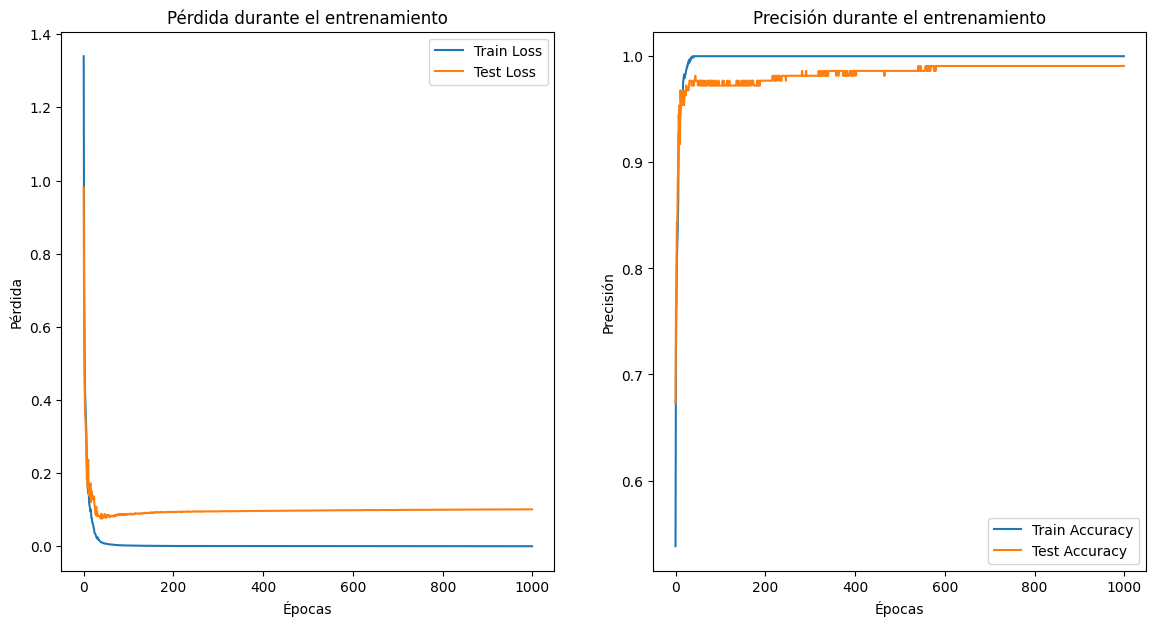

In [6]:
keras.backend.clear_session()
model2 = build_model('softmax','sparse_categorical_crossentropy',64,6,0.01)
history2 = model2.fit(X2_train, y2_train, validation_data=(X2_test, y2_test), epochs=1000, batch_size = 10, verbose=1) 
_, train_acc = model2.evaluate(X2_train, y2_train, verbose=0) 
_, test_acc = model2.evaluate(X2_test, y2_test, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.figure(figsize=(14,7))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Test Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

Análogamente al caso anterior, se puede decir que este modelo se comporta adecuadamente. 